# バックテスト検証ノート

In [1]:
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [3]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/tsu-nera/repo/bakuchi


In [4]:
from src.utils.backtesting import Backtesting, run_backtesting

%reload_ext autoreload
%autoreload 2

File doesn't exist 


In [5]:
bt = Backtesting(timestamp)

In [6]:
df_ex1 = bt.get_coincheck_df()
df_ex2 = bt.get_liquid_df()

In [7]:
len(df_ex1), len(df_ex2)

(25247, 25247)

## テスト実行

In [8]:
bt.run(amount=0.009, profit_margin_threshold=2000, profit_margin_diff=800)

##  取引履歴

In [9]:
arbitrage_histories = bt.get_arbitrage_histories()

headers = ["取引日時", "購入取引所", "売却取引所", "通貨ペア", "取引量", "期待利益"]
arbitrage_histories_df = pd.DataFrame(arbitrage_histories, columns=headers)
arbitrage_histories_df

,取引日時,購入取引所,売却取引所,通貨ペア,取引量,期待利益
0,2020-04-21 00:43:30,ExchangeId.LIQUID,ExchangeId.COINCHECK,BTC/JPY,0.009,10
1,2020-04-21 01:14:46,ExchangeId.COINCHECK,ExchangeId.LIQUID,BTC/JPY,0.009,-2
2,2020-04-21 01:21:17,ExchangeId.LIQUID,ExchangeId.COINCHECK,BTC/JPY,0.009,12
3,2020-04-21 01:21:46,ExchangeId.COINCHECK,ExchangeId.LIQUID,BTC/JPY,0.009,-4
4,2020-04-21 02:35:47,ExchangeId.LIQUID,ExchangeId.COINCHECK,BTC/JPY,0.009,11
...,...,...,...,...,...,...
67,2020-04-21 05:13:16,ExchangeId.COINCHECK,ExchangeId.LIQUID,BTC/JPY,0.009,-2
68,2020-04-21 05:34:45,ExchangeId.LIQUID,ExchangeId.COINCHECK,BTC/JPY,0.009,10
69,2020-04-21 06:21:54,ExchangeId.COINCHECK,ExchangeId.LIQUID,BTC/JPY,0.009,-3
70,2020-04-21 07:05:45,ExchangeId.LIQUID,ExchangeId.COINCHECK,BTC/JPY,0.009,9


In [10]:
histories = bt.get_trade_histories()
headers = ["取引日時",  "売買",  "取引所", "レート"]
histories_df = pd.DataFrame(histories, columns=headers)
histories_df

,取引日時,売買,取引所,レート
0,2020-04-21 00:43:30,買い,ExchangeId.LIQUID,763046
1,2020-04-21 00:43:30,売り,ExchangeId.COINCHECK,764200
2,2020-04-21 01:14:46,買い,ExchangeId.COINCHECK,763426
3,2020-04-21 01:14:46,売り,ExchangeId.LIQUID,763202
4,2020-04-21 01:21:17,買い,ExchangeId.LIQUID,760443
...,...,...,...,...
139,2020-04-21 06:21:54,売り,ExchangeId.LIQUID,742001
140,2020-04-21 07:05:45,買い,ExchangeId.LIQUID,741022
141,2020-04-21 07:05:45,売り,ExchangeId.COINCHECK,742125
142,2020-04-21 07:11:58,買い,ExchangeId.COINCHECK,742739


## 結果まとめ

In [11]:
bt.display()

バックテスト情報
+---------------------+---------------------+
|          レコード数 |               25247 |
+---------------------+---------------------+
|            取引回数 |                  72 |
+---------------------+---------------------+
|            開始日時 | 2020-04-21 00:32:37 |
+---------------------+---------------------+
|            終了日時 | 2020-04-21 08:37:49 |
+---------------------+---------------------+
|         取引時間[H] |     0 days 08:05:12 |
+---------------------+---------------------+
|       取引単位[BTC] |               0.009 |
+---------------------+---------------------+
|   利確しきい値[JPY] |                1000 |
+---------------------+---------------------+
| 損切りマージン[JPY] |                 800 |
+---------------------+---------------------+

バックテスト結果
+-------------+---------+
| 開始[JPY]   |   10000 |
+-------------+---------+
| 終了[JPY]   |   10343 |
+-------------+---------+
| 利益[JPY]   |     343 |
+-------------+---------+
| 開始[BTC]   |   0.022 |
+-------------+---------+
| 終了[BTC]  

## グラフ出力

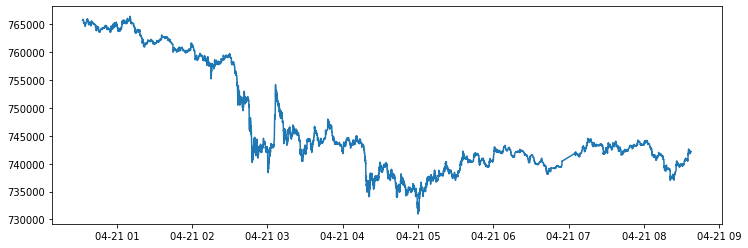

In [12]:
plt.figure(figsize=(12,4))
plt.plot(df_ex1.index, df_ex1['bid'])

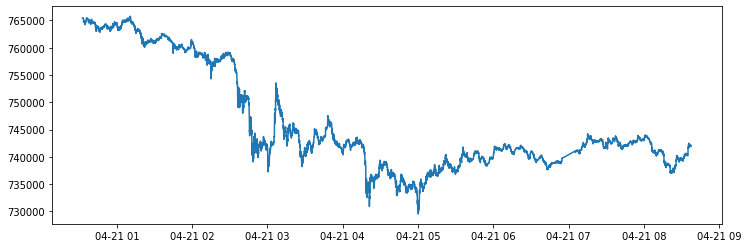

In [13]:
plt.figure(figsize=(12,4))
plt.plot(df_ex2.index, df_ex2['bid'])

## 分析

### 時間別の取引回数と利益

### 時間別の価格差の推移

In [14]:
profit_margin_df = pd.DataFrame({
    "timestamp": pd.to_datetime(df_ex1.index),
    "buy_coincheck_sell_liquid": df_ex2.reset_index().bid - df_ex1.reset_index().ask,
    "buy_liquid_sell_coincheck": df_ex1.reset_index().bid - df_ex2.reset_index().ask,
    'coincheck_bid': df_ex1.reset_index().bid,
     'liquid_ask': df_ex2.reset_index().ask,
    'liquid_bid': df_ex2.reset_index().bid,
    'coincheck_ask': df_ex1.reset_index().ask,
})

profit_margin_df = profit_margin_df.set_index("timestamp")

In [15]:
pd.options.display.float_format = '{:.0f}'.format
profit_margin_df.resample(rule='10Min').mean()

,buy_coincheck_sell_liquid,buy_liquid_sell_coincheck,coincheck_bid,liquid_ask,liquid_bid,coincheck_ask
timestamp,,,,,,
2020-04-21 00:30:00,-724,356,765311,764954,764896,765620
2020-04-21 00:40:00,-833,499,764432,763933,763873,764706
2020-04-21 00:50:00,-849,425,764415,763990,763920,764769
2020-04-21 01:00:00,-838,440,764945,764505,764445,765283
2020-04-21 01:10:00,-816,477,764258,763781,763698,764514
2020-04-21 01:20:00,-945,635,761755,761121,761034,761979
2020-04-21 01:30:00,-663,380,762261,761881,761835,762498
2020-04-21 01:40:00,-742,361,761141,760780,760705,761447
2020-04-21 01:50:00,-683,394,760447,760053,760011,760695
